In [1]:
#Step 1: Import Data set 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import scipy.stats as stats

# Load your dataset
data = pd.read_csv('GooglePlayStoreApps.csv')

In [3]:
#Step 2: Check the dependant variable is Normally distributed or not 

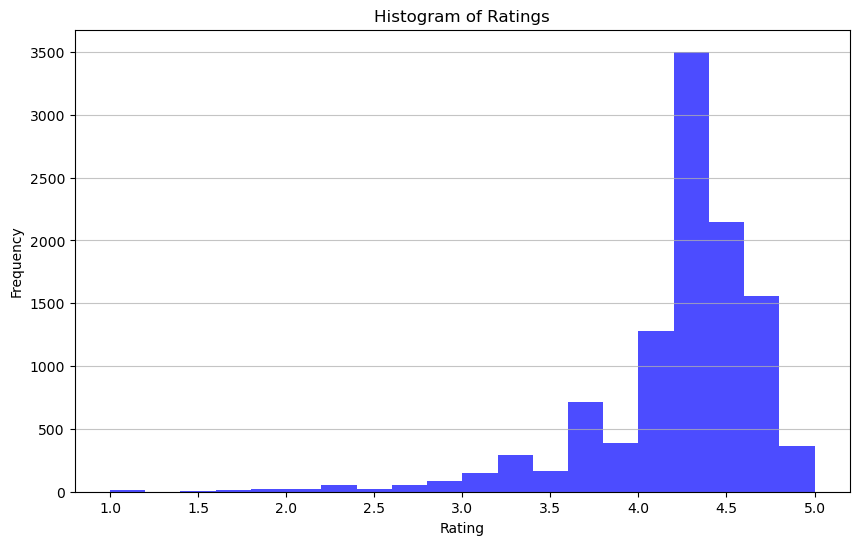

Shapiro-Wilk Test Statistic: 0.835647080276793
Shapiro-Wilk Test p-value: 3.66877642780603e-74


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10840.
  res = hypotest_fun_out(*samples, **kwds)


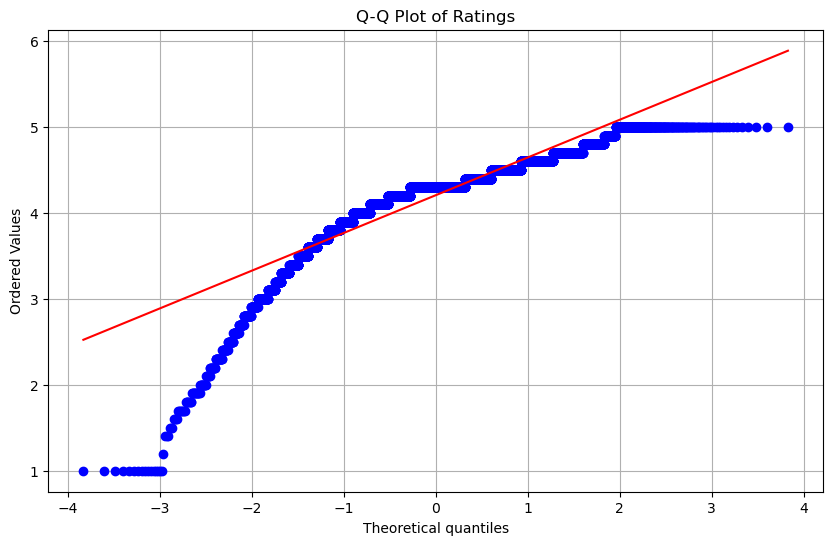

The ratings do not appear to be normally distributed (reject H0).


In [4]:
ratings = data['Rating']

# 1. Histogram
plt.figure(figsize=(10, 6))
plt.hist(ratings, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# 2. Shapiro-Wilk Test
shapiro_test = stats.shapiro(ratings)
print('Shapiro-Wilk Test Statistic:', shapiro_test.statistic)
print('Shapiro-Wilk Test p-value:', shapiro_test.pvalue)

# 3. Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(ratings, dist="norm", plot=plt)
plt.title('Q-Q Plot of Ratings')
plt.grid()
plt.show()

# Conclusion based on p-value
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("The ratings appear to be normally distributed (fail to reject H0).")
else:
    print("The ratings do not appear to be normally distributed (reject H0).")

In [5]:
#Step 3: Check how many are there for the independant variable 

In [6]:
#Get unique values for the independent variable 'Type'
unique_types = data['Type'].unique()
count_unique_types = len(unique_types)

print('Number of unique values for Type:', count_unique_types)
print('Unique values for Type:', unique_types)

Number of unique values for Type: 2
Unique values for Type: ['Free' 'Paid']


In [7]:
#Step 4: Conduct Wilcox.test

In [8]:
    #cannot do wilcox test in this 
    #instead used MannWhitney U test 
        #it deleivers similar values

In [9]:
# Filter data based on the two unique types
group1 = data['Rating'][data['Type'] == unique_types[0]].dropna()
group2 = data['Rating'][data['Type'] == unique_types[1]].dropna()

# Conduct the Mann-Whitney U test (Wilcoxon rank-sum test)
mannwhitney_test = stats.mannwhitneyu(group1, group2)

# Print the results
print('Mann-Whitney U Test Statistic:', mannwhitney_test.statistic)
print('Mann-Whitney U Test p-value:', mannwhitney_test.pvalue)

# Conclusion based on p-value
if mannwhitney_test.pvalue < alpha:
    print("There is a significant difference in ratings between the two groups (reject H0).")
else:
    print("There is no significant difference in ratings between the two groups (fail to reject H0).")

Mann-Whitney U Test Statistic: 3496100.0
Mann-Whitney U Test p-value: 7.510310280089427e-10
There is a significant difference in ratings between the two groups (reject H0).


#Conclusion

1. Our reasearch question is about Comparison of means
2. Our Dependant Variable 'Rating' do not appear to be Normally distributed.
3. There are exactly two values of the independant variable
4. The mann Whitney U test showed that there is a significant diffrence between the two groups.

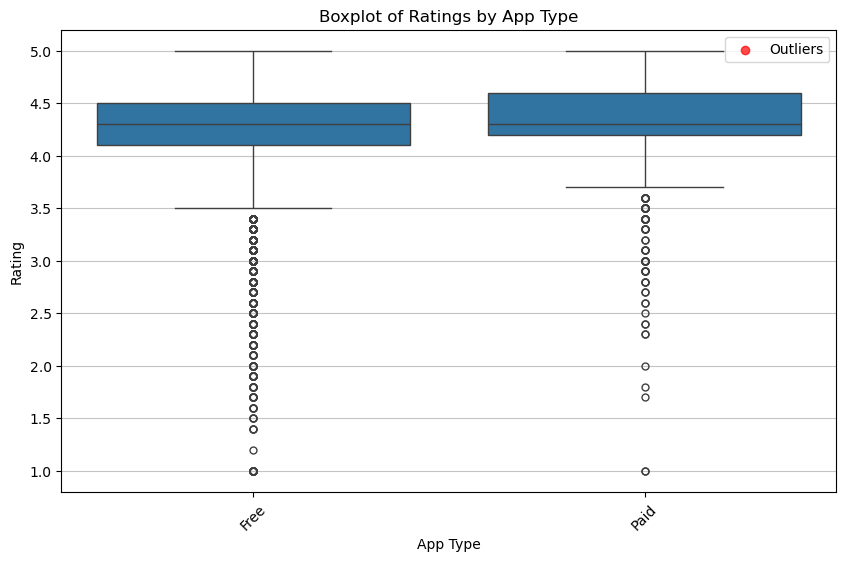

In [23]:
# Boxplot to show Ratings by Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Rating', data=data, fliersize=5)  # Adjust fliersize if needed
plt.title('Boxplot of Ratings by App Type')
plt.xlabel('App Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)

# Overlaying outlier points in red
outliers = data[data['Rating'].isin(data['Rating'][data.groupby('Type')['Rating'].apply(lambda x: x[x > (x.mean() + 1.5 * x.std())])])]
plt.scatter(x=data['Type'][outliers.index], y=outliers['Rating'], color='red', label='Outliers', alpha=0.7)

plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()

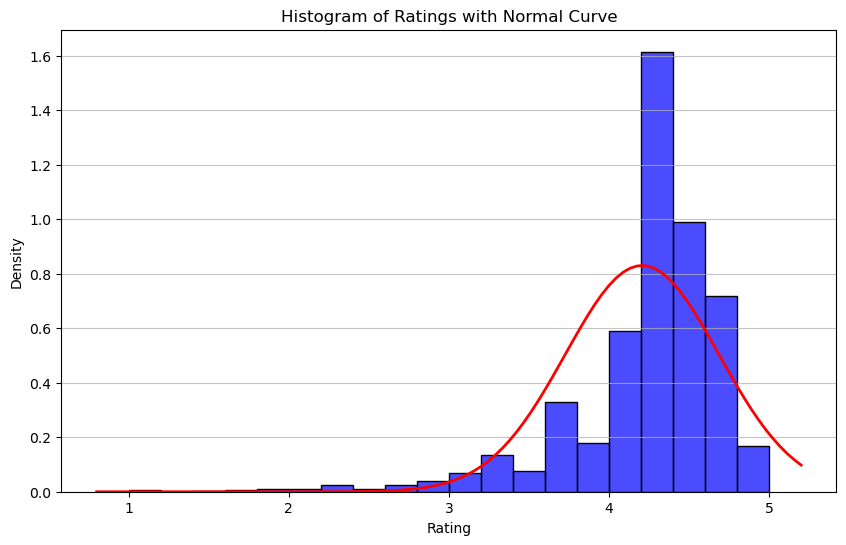

In [21]:
# Histogram of Ratings with normal curve overlay
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=20, kde=False, color='blue', stat='density', alpha=0.7)

# Overlay normal distribution
mean_rating = np.mean(data['Rating'].dropna())
std_rating = np.std(data['Rating'].dropna())

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_rating, std_rating)
plt.plot(x, p, 'r', linewidth=2)

plt.title('Histogram of Ratings with Normal Curve')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.75)
plt.show()